# Description of file:

This file aims to find the optimal threshold value for `fractal_dimension()` method, for images of a cityscape and a natural scene.

## Functions:

### `fractal_dimension(Z, threshold = 0.9)`:
This uses two arguments: `Z` = one of the normalised image, and `threshold` = the threhsold value for conversion from pixel intensities to binary arrays. This returns the coefficient of the graph in of Minkowski-Bouligand graph and `x` and `y` values (which are the log(s) and log(N(s)) from:

$$\ln[N(s)] = \textrm{ - Dimension}\: * \: \ln(s) + h(s) $$


### `linreg_score(x1,y1)`:
Provides the R^2 fit of the plot above using the `sklearn` module.

### `thresholds(fname, thresh = 0.9)`:
Use the threshold variable to convert the image to binary array, and to display the resultant image.

### `clean(diction)`:
Cleans the dictionary from nan values.


### `thresholds_graph(file_dir))`:  
Finds the R^2 value for a range of threshold values, using the `lin_reg()` method.

In [40]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms
import math

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]

In [41]:
def linreg_score(x1,y1):
    # this function returns the R^2 fit of arguments x1 and y1
    
    model = LinearRegression()
    x1 = x1.reshape(-1, 1)
    y1 = y1.reshape(-1, 1)

    model.fit(x1, y1)

    return model.score(x1,y1)

In [43]:

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image

    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transform Z into a binary array
    Z = (Z <= threshold)

    # Minimal dimension of image
    p = min(Z.shape)

    
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))
    #print(n)
    
    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    # Build successive box sizes (from 2**n down to 2**1)
    sizes = 2**np.arange(n, 1, -1)
    sizes = list(sizes)
    sizes = sizes[1:]
    
    # Actual box counting with decreasing size
    counts = []
    

    sizes = np.array(sizes)
    
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)

    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)

    
    return -coeffs[0], x, y



In [44]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    I = I/256
    coeff, x, y  = fractal_dimension(I, pixel_threshold)
    return coeff, x, y

In [48]:
def thresholds(fname, thresh = 0.9):
    im = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

    im = im/256 # normalises the image
    assert(len(im.shape) == 2) # checks image is 2 dimensional

    im = (im <= thresh) # transforms the image to binaray array
    plt.axis('off')
    plt.imshow(im) # display the binary array
    coeff, x, y  = fractal_dimension(im, thresh)
    print(coeff)

In [49]:
def clean(diction):
    # clean diction argument from nan values 
    
    for key in list(diction.keys()):
        if math.isnan(diction[key]):
            del diction[key]
    return diction


def thresholds_graph(file_dir):
    thresholds = np.arange(0,0.9, 0.02).tolist() # form range of values for the threshold variable
    thresholds = [round(i,2) for i in thresholds ]
    thresholds = thresholds[1:]
    
    # dictionary of fractal dimension values
    thresh_dict = {}
    
    # dictionary of R^2 values
    thresh_fits = {}
    
    for i in thresholds:
        coeff, x, y  = start(file_dir, i)
        thresh_dict[i] = coeff
        thresh_fits[i] = linreg_score(x, y)
    thresh_dict = clean(thresh_dict)
    
    return thresh_dict, thresh_fits

## Plots the Wilder buildings R^2 vs Threshold values

In [72]:
vals = thresholds_graph("./wilderBuilding.jpeg")[1]

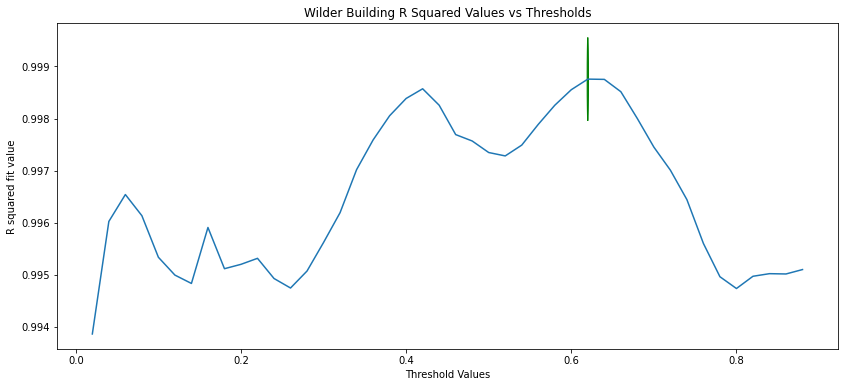

In [73]:
circle3 = plt.Circle(( max(vals, key=vals.get), max(vals.values())), radius = 0.0008, color='g', clip_on=False)
fig, ax = plt.subplots()
ax.plot(vals.keys(), vals.values())
ax.add_patch(circle3)

ax.set_xlabel('Threshold Values')
ax.set_ylabel('R squared fit value')
ax.title.set_text("Wilder Building R Squared Values vs Thresholds")

In [74]:
print("threshold that corresponds to the maximum of R^2 value : {}".format(max(vals, key=vals.get)))

threshold that corresponds to the maximum of R^2 value : 0.62


## Plots the Forrest scence's R^2 vs Threshold values

In [75]:
vals = thresholds_graph("./forrest.jpeg")[1]

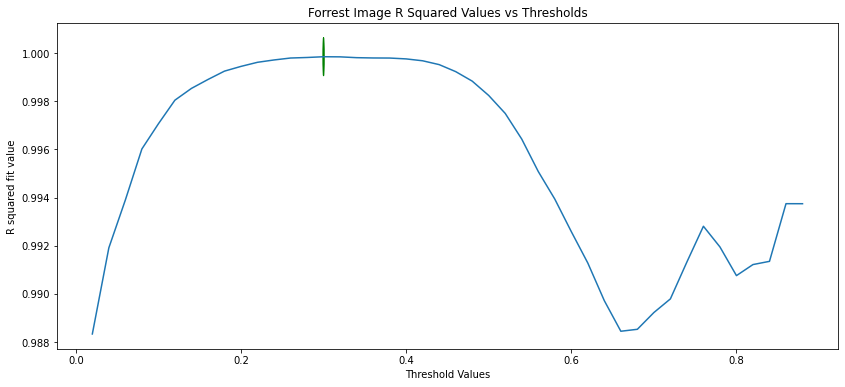

In [76]:
circle3 = plt.Circle(( max(vals, key=vals.get), max(vals.values())), radius = 0.0008, color='g', clip_on=False)
fig, ax = plt.subplots()
ax.plot(vals.keys(), vals.values())
ax.add_patch(circle3)

ax.set_xlabel('Threshold Values')
ax.set_ylabel('R squared fit value')
ax.title.set_text("Forrest Image R Squared Values vs Thresholds")

In [77]:
print("threshold that corresponds to the maximum of R^2 value : {}".format(max(vals, key=vals.get)))

threshold that corresponds to the maximum of R^2 value : 0.3


## Images at optimal threshold

1.7134726642313411


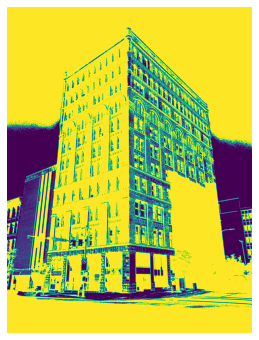

In [58]:
thresholds("./wilderBuilding.jpeg", 0.62)

1.8365731701294048


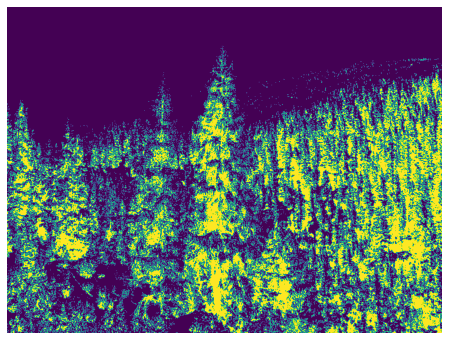

In [59]:
thresholds("./forrest.jpeg", 0.3)

## Images at default threshold

1.3858413020480245


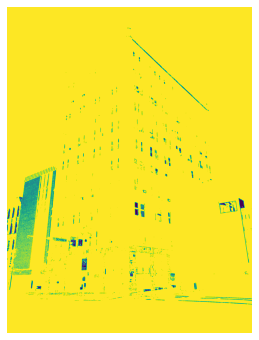

In [60]:
thresholds("./wilderBuilding.jpeg", 0.9)

1.2281068220638123


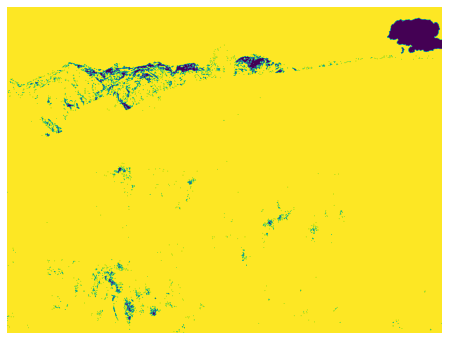

In [61]:
thresholds("./forrest.jpeg", 0.9)